In [1]:
# 8.2 Term Project Milestone 2
# Data Preparation
## Justin Wisniewski

In [2]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Milestone 1

In [4]:
# Read in the Insurance Claim dataset
df=pd.read_csv("insurance_data.csv")

In [5]:
# Display the first 5 rows of data
df.head(5)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [6]:
# Identify missing values within columns
# There are missing values within the age and region column
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [7]:
# Dropping index and patientID columns
df = df.drop(['index','PatientID'], axis=1)
df.shape

(1340, 9)

In [8]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

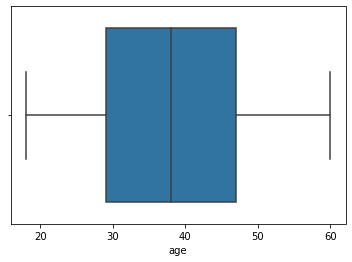

In [9]:
# Use boxplot to identify age range of claim submissions, as well as any outliers that may exist
sns.boxplot(df['age'])

In [10]:
# Fill in missing values in age column with mean
df['age'] = df['age'].fillna(df['age'].mean())

In [11]:
# Fill missing values in region column with the most amount of unique value in data
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [12]:
df.isna().sum().sum()

0

In [13]:
# Split numeric and categoric features to make it easy for data preprocessing
numeric_columns = df.select_dtypes(exclude = ["object"])
numeric_columns

,age,bmi,bloodpressure,children,claim
0,39.000000,23.2,91,0,1121.87
1,24.000000,30.1,87,0,1131.51
2,38.078652,33.3,82,0,1135.94
3,38.078652,33.7,80,0,1136.40
4,38.078652,34.1,100,0,1137.01
...,...,...,...,...,...
1335,44.000000,35.5,88,0,55135.40
1336,59.000000,38.1,120,1,58571.07
1337,30.000000,34.5,91,3,60021.40
1338,37.000000,30.4,106,0,62592.87


In [14]:
categoric_columns = df.select_dtypes(include = ["object"])
categoric_columns

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


<AxesSubplot:>

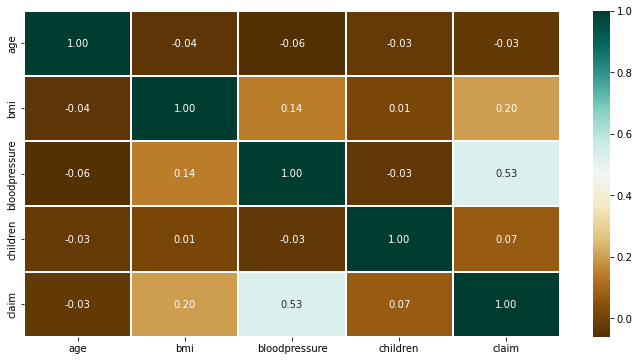

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
    cmap = 'BrBG',
    fmt = '.2f',
    linewidths = 2,
    annot = True)

In [16]:
# Blood pressure has strongest correlation score to claim cost
# BMI has the second strongest correlation score to claim cost

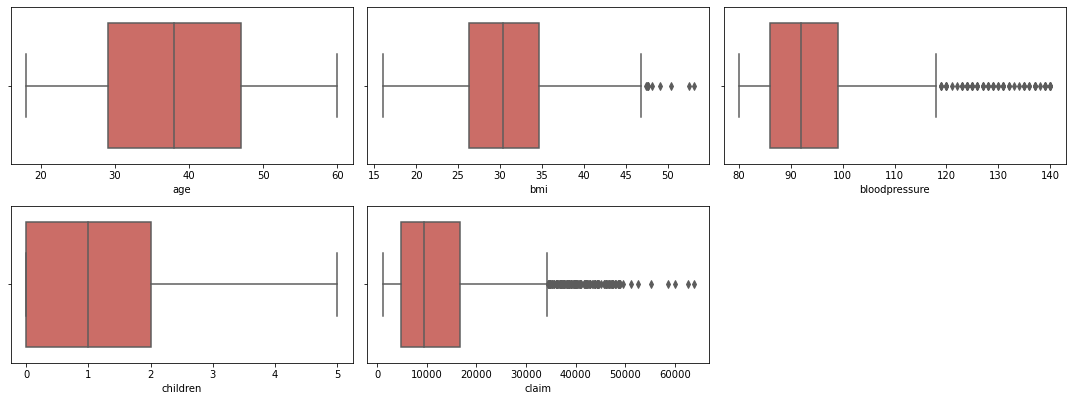

In [17]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.boxplot(x=i, data=df, palette="hls")
    number += 1
    plt.tight_layout()

In [18]:
# Outliers in BMI, Blood Pressure, and Claim columns will need to be deleted

C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jwiz3\anaconda\lib\site-p

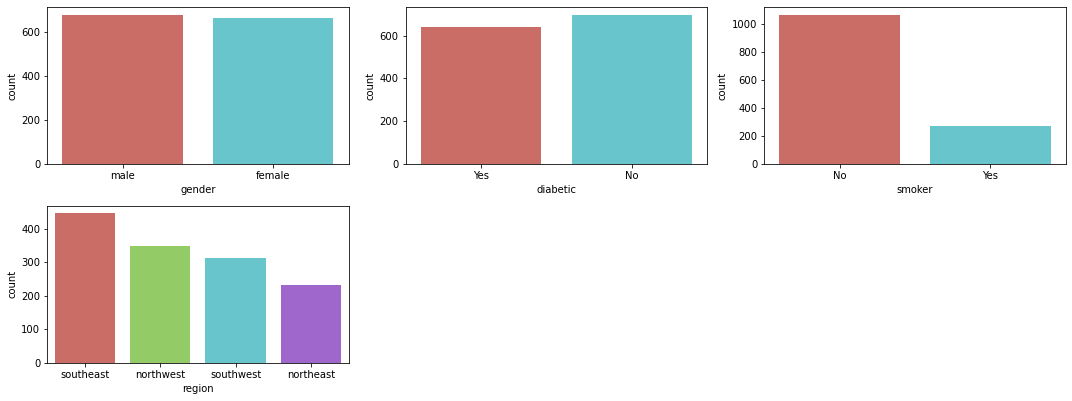

In [19]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 3, number)
    sns.countplot(df[i], palette="hls")
    number += 1
    plt.tight_layout()

In [20]:
# Male, Not Diabetic, Non-Smoker, and Southeast Region are most common claim submittors

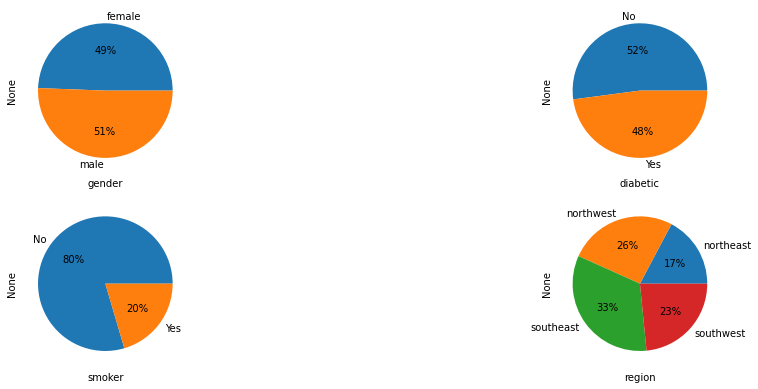

In [21]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 2, number)
    df.groupby(i).size().plot(kind='pie', autopct='%.0f%%')
    plt.xlabel(i)
    number += 1
    plt.tight_layout()

In [22]:
# Pie chart visualization with percentages for categorical variables

In [23]:
# Milestone 2

In [24]:
# Display the first 5 rows of data
df.head(5)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [25]:
# Dropping children as this feature is not useful with the target of modeling being claim
df = df.drop(['children'], axis=1)

In [27]:
# Categorize the BMI values
def bmi_categories(value):
    if pd.isna(value):
        return np.nan
    
    if value < 18.5:
        return "underweight"
    elif value >= 18.5 and value < 25:
        return "normal"
    elif value >= 25 and value <= 30:
        return "overweight"
    elif value >= 30:
        return "obesity"
    else:
        return value

# Create the category according to the values above
df["bmi_cat"] = df["bmi"].apply(lambda x: bmi_categories(x)).copy()

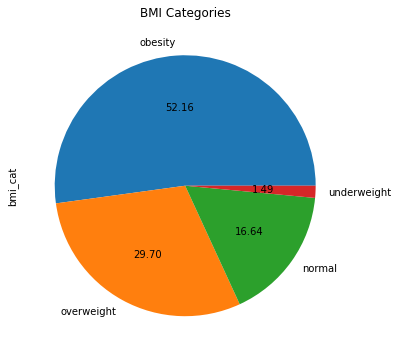

In [29]:
df["bmi_cat"].value_counts().plot.pie(title="BMI Categories", autopct='%.2f', 
                                      figsize=(6, 6));

# Overweight and obesity category make up a total of 81.86%

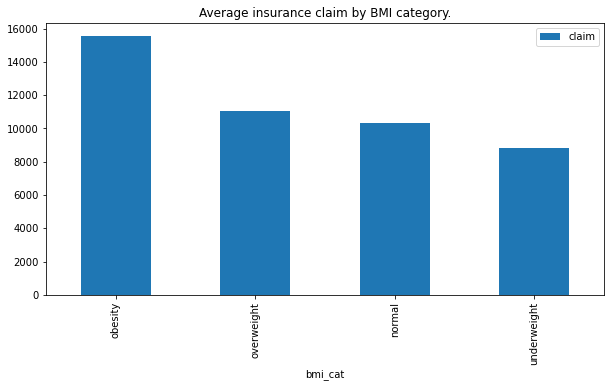

In [31]:
# Populate bar chart to compare average insurance claims amongst the BMI categories established in the previous step
df.groupby(by="bmi_cat")["claim"].mean() \
    .reset_index() \
    .sort_values(by="claim", ascending=False) \
    .plot.bar(title="Average insurance claim by BMI category.", 
              figsize=(10, 5), x="bmi_cat"
            );

<AxesSubplot:title={'center':'BMI and Claim Amount'}, xlabel='bmi', ylabel='claim'>

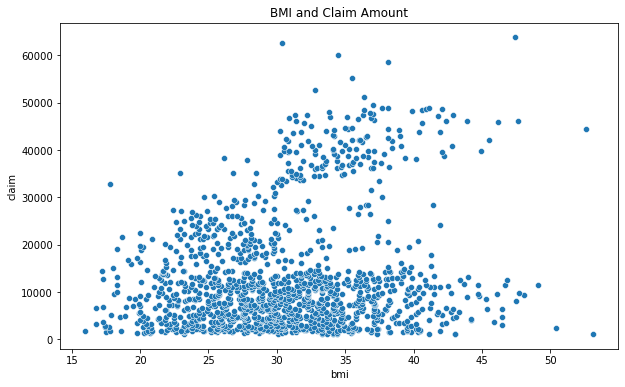

In [35]:
# Appears there is a correlation between the obesity category and higher average insurance claims
# Additional visualization
# Set the width and height of the figure
plt.figure(figsize=(10,6))


# Add title
plt.title("BMI and Claim Amount")


sns.scatterplot(x=df['bmi'], y=df['claim'])

In [32]:
# Organize ages into generational groups

age_range = [13,28,46,58,61]
labels = ['Gen Z','Millennials', 'Gen X', 'Baby Boomers']
df['age_group'] = pd.cut(df['age'], age_range,labels=labels)
ageGroup = df[['age_group', 'claim']].groupby('age_group').mean().sort_values(by="claim", ascending=True)

<AxesSubplot:title={'center':'Claims per Age Group'}, ylabel='age_group'>

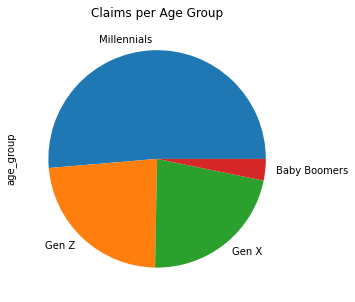

In [34]:
plt.figure(figsize = (10,5))
df['age_group'].value_counts().plot(kind='pie', title = "Claims per Age Group")

In [ ]:
# Millennials received the most health insurance claims

In [37]:
df

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim,bmi_cat,age_group
0,39.000000,male,23.2,91,Yes,No,southeast,1121.87,normal,Millennials
1,24.000000,male,30.1,87,No,No,southeast,1131.51,obesity,Gen Z
2,38.078652,male,33.3,82,Yes,No,southeast,1135.94,obesity,Millennials
3,38.078652,male,33.7,80,No,No,northwest,1136.40,obesity,Millennials
4,38.078652,male,34.1,100,No,No,northwest,1137.01,obesity,Millennials
...,...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5,88,Yes,Yes,northwest,55135.40,obesity,Millennials
1336,59.000000,female,38.1,120,No,Yes,northeast,58571.07,obesity,Baby Boomers
1337,30.000000,male,34.5,91,Yes,Yes,northwest,60021.40,obesity,Millennials
1338,37.000000,male,30.4,106,No,Yes,southeast,62592.87,obesity,Millennials


<AxesSubplot:title={'center':'Correlation between Generation and BMI'}, xlabel='age_group', ylabel='count'>

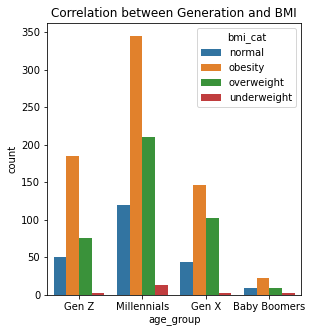

In [38]:
# Build plot
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
# Correlation plot for generational category vs bmi
plt.title("Correlation between Generation and BMI")
sns.countplot(x ='age_group', hue = 'bmi_cat', data = df)

Text(0, 0.5, 'Claim Amount')

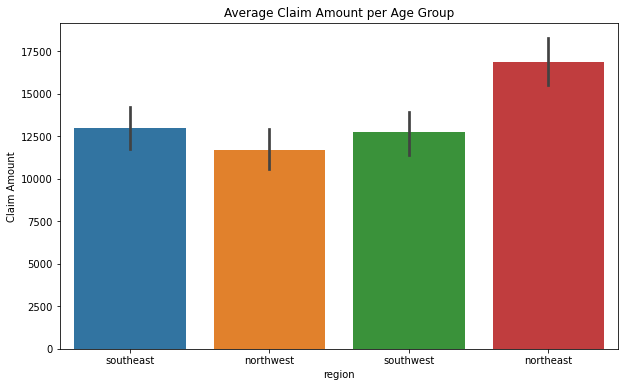

In [39]:
# Set the width and height of plot
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Claim Amount per Age Group")

# Bar chart regions and claims
sns.barplot(x=df.region, y=df['claim'])

# Add label for vertical axis
plt.ylabel("Claim Amount")